In [ ]:
#This attempt utilizes the original dataframe and applies a log transformation to the target variable.

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt


In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("resources/original_csv.csv")
df = pd.read_csv(file_path)
# Review the DataFrame
df.head()

,Transaction Number,Transaction Date,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,102-1-2023,2023-01-02 07:25:49,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,105.75,2 B/R,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3
1,102-10-2023,2023-01-02 08:06:49,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,52.29,Studio,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3
2,102-100-2023,2023-01-02 09:01:22,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Al Wasl,Unit,Flat,...,161.32,2 B/R,1,NaN,NaN,NaN,1,1,NaN,Fern
3,102-1000-2023,2023-01-05 13:26:06,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,Flat,...,99.64,2 B/R,1,Damac Properties,Marina Mall,Burj Al Arab,1,1,NaN,SEVEN CITY JLT
4,102-10000-2023,2023-03-01 16:02:19,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,...,63.95,1 B/R,1,Dubai Internet City,Marina Mall,Sports City Swimming Academy,1,1,NaN,Binghatti Corner


In [3]:
df = df.drop(columns=['Transaction Number', 'Transaction Date','Master Project','Project','Transaction sub type','Property Sub Type','Transaction Size (sq.m)','Parking','Nearest Metro','Nearest Mall', 'Nearest Landmark'])


In [4]:
df = df[df["Property Type"] != "Land"]


In [6]:
df = df.dropna()
df

,Transaction Type,Registration type,Is Free Hold?,Usage,Area,Property Type,Amount,Property Size (sq.m),Room(s),No. of Buyer,No. of Seller
0,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,2631000.0,105.75,2 B/R,1,1
1,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,1466000.0,52.29,Studio,1,1
2,Sales,Off-Plan,Free Hold,Residential,Al Wasl,Unit,3309000.0,161.32,2 B/R,1,1
3,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,1170137.0,99.64,2 B/R,1,1
4,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,590000.0,63.95,1 B/R,1,1
...,...,...,...,...,...,...,...,...,...,...,...
81596,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,829878.0,106.65,2 B/R,0,0
81597,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,907122.0,127.92,2 B/R,0,0
81598,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,583109.0,77.22,1 B/R,0,0
81599,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,600000.0,85.84,1 B/R,0,0


In [7]:
# Remove outliers with 3*STD
mean = df['Amount'].mean()
std_dev = df['Amount'].std()
threshod = 3 * std_dev
df = df[abs(df["Amount"] - mean) <= threshod]
df

,Transaction Type,Registration type,Is Free Hold?,Usage,Area,Property Type,Amount,Property Size (sq.m),Room(s),No. of Buyer,No. of Seller
0,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,2631000.0,105.75,2 B/R,1,1
1,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,1466000.0,52.29,Studio,1,1
2,Sales,Off-Plan,Free Hold,Residential,Al Wasl,Unit,3309000.0,161.32,2 B/R,1,1
3,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,1170137.0,99.64,2 B/R,1,1
4,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,590000.0,63.95,1 B/R,1,1
...,...,...,...,...,...,...,...,...,...,...,...
81596,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,829878.0,106.65,2 B/R,0,0
81597,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,907122.0,127.92,2 B/R,0,0
81598,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,583109.0,77.22,1 B/R,0,0
81599,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,600000.0,85.84,1 B/R,0,0


In [8]:
# Encode variables.
df = pd.get_dummies(df)


In [9]:
X = df.drop('Amount', axis=1)
y = df['Amount']

In [10]:
# Apply log transformation to the target variable
y_log = np.log(y)  

In [13]:
# Split the data into testing and training datasets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=0)

In [14]:
# Use standardscaler to standardizze the features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# Create the SVR model.

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model on the scaled training data
svr_model.fit(X_train_scaled, y_train.ravel())

SVR()

In [16]:
# Make predictions on the scaled test data
from sklearn.metrics import mean_squared_error, r2_score

y_pred = svr_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
std = np.std(y)
# Display the computed metrics
print("R-squared Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Standard Deviation (std) of the target variable:", std)

Mean Squared Error: 0.09549579437713886
R-squared Score: 0.8536736936248113
Mean Squared Error (MSE): 0.09549579437713886
Root Mean Squared Error (RMSE): 0.3090239381943393
Standard Deviation (std) of the target variable: 1526045.9656100976


In [17]:
# First attempt took 2 minutes and 34 seconds.
#Mean Squared Error: 0.09549579437713886
#R-squared Score: 0.8536736936248113
#Mean Squared Error (MSE): 0.09549579437713886
#Root Mean Squared Error (RMSE): 0.3090239381943393
#Standard Deviation (std) of the target variable: 1526045.9656100976

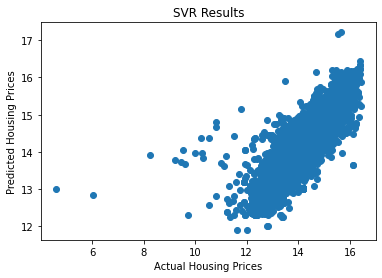

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title('SVR Results')
plt.show()